#***World Housing Pilot Project Reseacrh: Kitchener Waterloo***

##In this project, we access the database of housing organizations and resources for the Kitchener and Waterloo area and gather information and analysis on each

Below, we import all the necesssary libraries for our analysis.

In [ ]:
#imports
!pip install ucimlrepo
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urljoin
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.preprocessing import StandardScaler
import random

Below, we scrape the wwhealthline affordable housing page to get a dictionary of organizations, with the key being the name of the organization and the value being the link to the organization specific page for each (to be used in analysis later on) and then repeat this to get the website of each organization.

In [ ]:
#snippits of suggested code from google-collab platform by not-anshuman/scraper-aditya
#function to get the names and urls of each organization mentioned on this site

#website with information about each housing organization in list
url = 'https://www.wwhealthline.ca/printServiceList.aspx?id=10865'

def get_organizations(url):

  response = requests.get(url)

  soup = BeautifulSoup(response.text, 'html.parser')
  #parse through web content and get each row of the table
  rows = soup.find_all("tr")

  organizations = {} #initialize the dictionary for the urls

  for row in rows:
      #get the name of the organization and the url for each
      link = row.find("td", id=lambda x: x and x.startswith("rptRegionalServices"))
      if link:
          link_tag = link.find("a")
          if link_tag:
              name = link_tag.get_text()
              org_url = urljoin(url, link_tag['href'])
              #add to dictionary of services
              organizations[name] = org_url
  return(organizations)

organizations = get_organizations(url)



In [ ]:
#print the organizations and urls in a more comprehensive way
for key, value in organizations.items():
  print(f"{key}: {value}")

Alfred Haenchen Co-operative Homes: https://www.wwhealthline.ca/displayService.aspx?id=214371
Asgard Green Cooperative Homes: https://www.wwhealthline.ca/displayService.aspx?id=214547
Aventine Cooperative Homes: https://www.wwhealthline.ca/displayService.aspx?id=214549
Beaver Creek Housing Cooperative: https://www.wwhealthline.ca/displayService.aspx?id=214577
Beechwood Co-operative Homes: https://www.wwhealthline.ca/displayService.aspx?id=214578
Beyond Housing: https://www.wwhealthline.ca/displayService.aspx?id=214415
Bread and Roses Cooperative Homes: https://www.wwhealthline.ca/displayService.aspx?id=214611
Brighton Yards Housing Cooperative: https://www.wwhealthline.ca/displayService.aspx?id=214613
Cambridge Kiwanis Housing - Cambridge Kiwanis Village: https://www.wwhealthline.ca/displayService.aspx?id=214776
Cambridge New Hope Housing Cooperative: https://www.wwhealthline.ca/displayService.aspx?id=214773
Clarion Cooperative Homes: https://www.wwhealthline.ca/displayService.aspx?id=

In [ ]:
#function to get websites from each page of the database
def get_websites(url):

  response = requests.get(url)

  soup = BeautifulSoup(response.text, 'html.parser')


  link_tag = soup.find('a', id='ctl00_ContentPlaceHolder1_lnkUrl')

  #get the link to the website if it is specified on wwhealthline
  if link_tag:
      link = link_tag.get('href')
  else:
      link = 'No link found'
  return link

In [ ]:
websites = {} #initialize the dictionary for the websites

for key, value in organizations.items():
  websites[key] = get_websites(value)
#get websites and print clearly

for key, value in websites.items():
  print(f"{key}: {value}")

Alfred Haenchen Co-operative Homes: No link found
Asgard Green Cooperative Homes: No link found
Aventine Cooperative Homes: http://aventineco-ophomes.ca/
Beaver Creek Housing Cooperative: http://beavercreek.coop
Beechwood Co-operative Homes: http://beechwoodco-op.ca/
Beyond Housing: http://beyondhousing.ca/
Bread and Roses Cooperative Homes: No link found
Brighton Yards Housing Cooperative: http://www.brightonyards.ca
Cambridge Kiwanis Housing - Cambridge Kiwanis Village: http://housingcatalogue.regionofwaterloo.ca/Property/Details/104
Cambridge New Hope Housing Cooperative: http://housingcoop.wixsite.com/cambridgenewhope
Clarion Cooperative Homes: http://www.clarionco-op.ca
Country Hills Housing Cooperative: http://aventineco-ophomes.ca/
Cypriot Homes of the Kitchener-Waterloo Area - Cypriot Homes I: http://housingcatalogue.regionofwaterloo.ca/Property/Details/11
Cypriot Homes of the Kitchener-Waterloo Area - Cypriot Homes II: http://housingcatalogue.regionofwaterloo.ca/Property/Detai

Now that we have the name and resources for each organization, we can begin the analysis of which ones may be more suitable for the World Housing domestic project (in the Kitchener-Waterloo area specifically)

In [ ]:
for value in websites.values():
  print(value)

No link found
No link found
http://aventineco-ophomes.ca/
http://beavercreek.coop
http://beechwoodco-op.ca/
http://beyondhousing.ca/
No link found
http://www.brightonyards.ca
http://housingcatalogue.regionofwaterloo.ca/Property/Details/104
http://housingcoop.wixsite.com/cambridgenewhope
http://www.clarionco-op.ca
http://aventineco-ophomes.ca/
http://housingcatalogue.regionofwaterloo.ca/Property/Details/11
http://housingcatalogue.regionofwaterloo.ca/Property/Details/13
http://homestarts.wixsite.com/emanuel
http://fiferoadco-op.ca/
http://homestarts.wixsite.com/grandview
http://habitatgw.ca
http://www.habitatwr.ca
http://www.heartwoodplace.ca
http://www.homesuitehope.org
http://www.housingcambridge.com/
http://kwunwp.weebly.com
http://kitchenerhousinginc.ca/
http://www.dmsproperty.com/apartments-for-rent/kw-multigroup-homes
http://housingcatalogue.regionofwaterloo.ca/Property/Details/37
http://housingcatalogue.regionofwaterloo.ca/Property/Details/90
http://owenhomes.ca/my-owens-place/
ht

{'Homes': 6, 'Housing Cooperative': 4, 'Cypriot Homes': 2, 'Co-operative Homes': 2, 'Habitat for': 2, 'Starling Community': 2, 'Victoria Park': 10, 'Wellington (County': 2, 'Cooperative Homes': 2, 'YW -': 3}


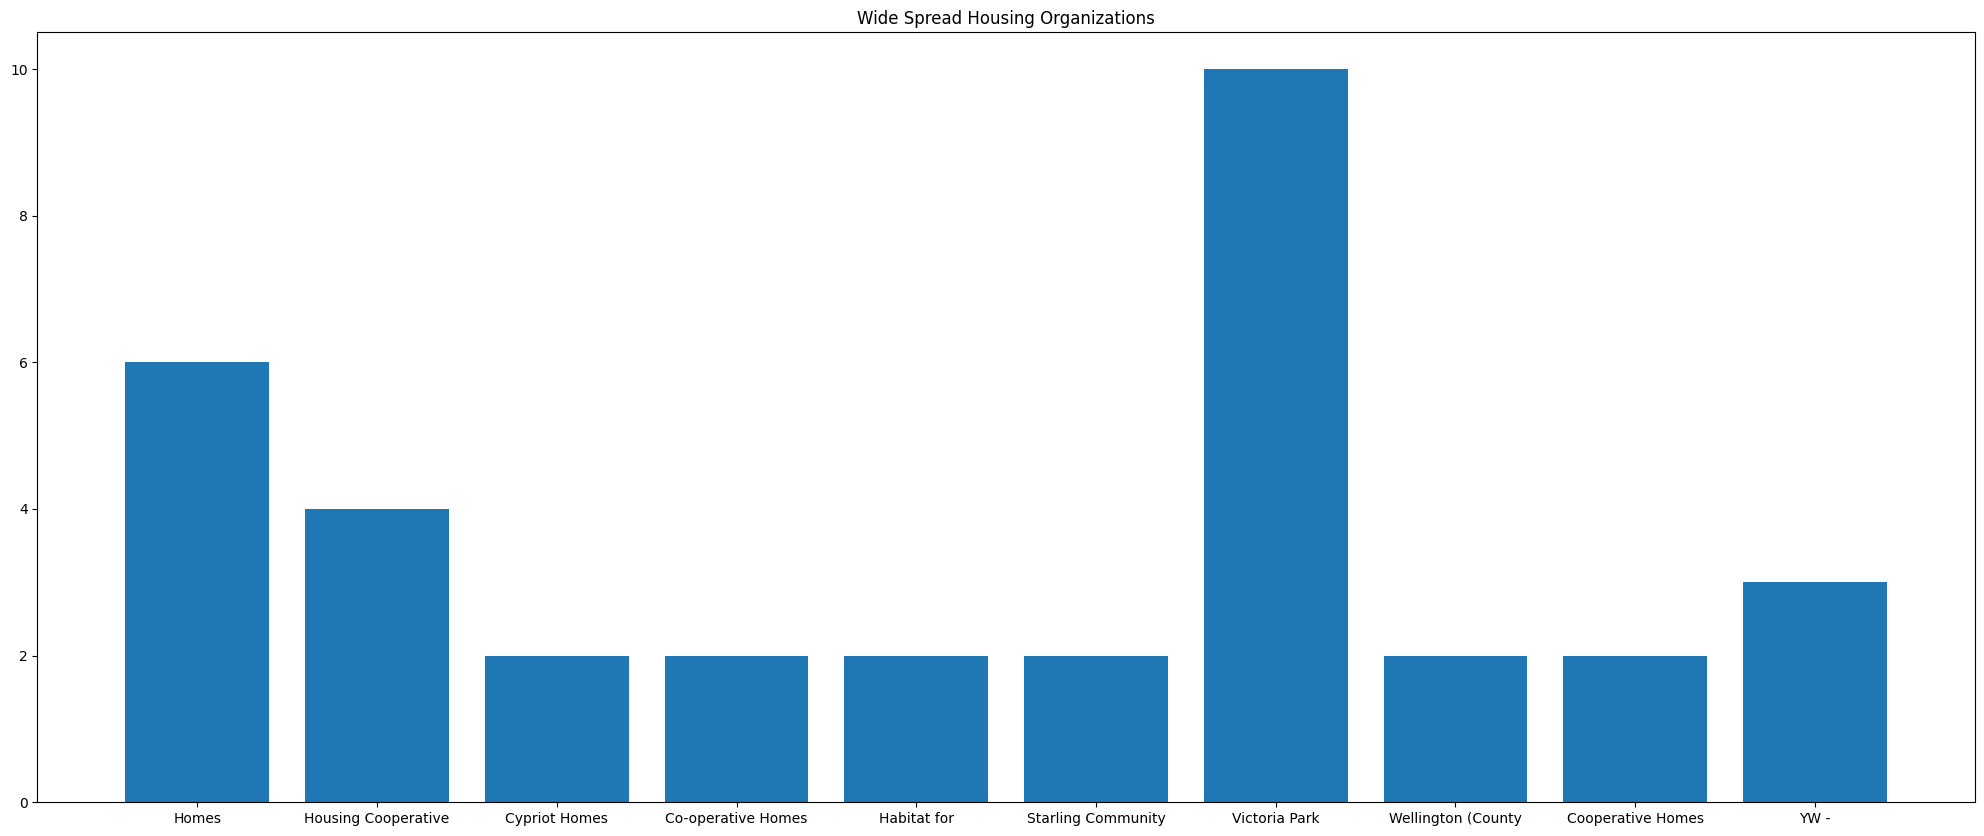

In [ ]:
#see which general larger organizations have sub organizations (cover more than one specific area)
orgs = list(organizations.keys()) #get list of organizations

def find_larger_orgs(orgs):

  all_first2words = [] #intialize list for all first two words
  all_last2words = [] #intialize list for all first two words
  larger_orgs = {} #intialize dictionary for those whos first 2s get repeated

  for org in orgs:

    first_2_words =  ' '.join(org.split(' ')[:2])
    last_2_words =  ' '.join(org.split(' ')[2:])

    if first_2_words in all_first2words and first_2_words != '':
      if first_2_words in larger_orgs.keys():
        larger_orgs[first_2_words] += 1 #if it appears in the all list already, add another instance # to the larger orgs
      else:
        larger_orgs[first_2_words] = 2 #add it to larger list if not (2 because this is second time it appears)
    all_first2words.append(first_2_words) #add it to the list again (either way)

    #same as above with last two instead
    if last_2_words in all_last2words and last_2_words != '':
        if last_2_words in larger_orgs.keys():
          larger_orgs[last_2_words] += 1
        else:
          larger_orgs[last_2_words] = 2
    all_last2words.append(last_2_words)

  return larger_orgs

larger_orgs = find_larger_orgs(orgs)
print(larger_orgs)

plt.figure(figsize=(25, 10))
categories = larger_orgs.keys()
values = larger_orgs.values()
#plot results
plt.bar(categories, values)
plt.title('Wide Spread Housing Organizations')

plt.show()

In the above chart, we go through the data sources found through the wwhealthline site, which contains many affordable housing organizations, and observe which ones are under the same overarching company and may have a wider stretch of impact in the area.

In [ ]:
#function to get the description from the wwhealthline page for each organization
def get_description(url):
    response = requests.get(url)
    if response.status_code != 200:
        return "Failed to retrieve description"

    soup = BeautifulSoup(response.text, 'html.parser')
    description_span = soup.find('span', {'id': 'ctl00_ContentPlaceHolder1_lblDescription'})

    if description_span:
        description_text = description_span.get_text(separator=" ", strip=True)
        return description_text
    else:
        return "No description found"


In [ ]:
descriptions = {} #initialize the dictionary for the descriptions

for key, value in organizations.items():
  descriptions[key] = get_description(value)
#get blurbs and print clearly

for key, value in descriptions.items():
  print(f"{key}: {value}")

Alfred Haenchen Co-operative Homes: Affordable housing provides individuals and families housing that meet their needs and that they can afford
Asgard Green Cooperative Homes: Provides people and families housing that meet their needs and that they can afford
Aventine Cooperative Homes: Provides people and families housing that meet their needs and that they can afford
Beaver Creek Housing Cooperative: Affordable housing * two, three, four bedroom townhouse * two bedroom apartment
Beechwood Co-operative Homes: Affordable housing
Beyond Housing: Provides individuals and families housing that meet their needs and that they can afford
Bread and Roses Cooperative Homes: Two affordable apartments downtown * 66 apartments
Brighton Yards Housing Cooperative: Affordable housing * 45-family units
Cambridge Kiwanis Housing - Cambridge Kiwanis Village: Affordable housing available at two buildings * 174 three-storey units available at 340, 355, 360 Linden Dr * 23 units available at 365 Linden Dr


In [ ]:

#scrape each description for advocacy profile key words
women = ['women', 'mother', 'mothers', 'female', 'girls']
children = ['child', 'children']
single_parent = ['single-parent', 'single parent']
individuals = ['individuals', 'individual', 'single']
family = ['family', 'families']
senior_citizens = ['senior', 'older', 'old', 'elderly']
services = ['needs', 'services', 'support', 'supports', 'help', 'helps']
homeless = ['homeless', 'homelessness']
indigenous = ['native', 'natives', 'indigenous', 'indigenous people']
coop = ['cooperative', 'cooperatives', 'cooperative housing', 'coop', 'co-op']
accessibility = ['accessibility', 'accessible', 'disabled', 'disabilities', 'wheelchair', 'impaired']


def get_advocacy_profile(descriptions):
  advocacy_profile = {} #initialize the dictionary for the advocacy profiles
  for org in descriptions.keys():
    advocacy_profile[org] = []
    description = descriptions[org]
    if description == 'No description found':
      continue
    lower_desc = description.lower()
    lower_org = org.lower()

        # Check each keyword list
    if any(keyword in lower_desc or keyword in lower_org for keyword in women):
        advocacy_profile[org].append('women')
    if any(keyword in lower_desc or keyword in lower_org for keyword in children):
        advocacy_profile[org].append('children')
    if any(keyword in lower_desc or keyword in lower_org for keyword in single_parent):
        advocacy_profile[org].append('single-parent')
    if any(keyword in lower_desc or keyword in lower_org for keyword in individuals):
        advocacy_profile[org].append('individuals')
    if any(keyword in lower_desc or keyword in lower_org for keyword in family):
        advocacy_profile[org].append('family')
    if any(keyword in lower_desc or keyword in lower_org for keyword in senior_citizens):
        advocacy_profile[org].append('senior-citizens')
    if any(keyword in lower_desc or keyword in lower_org for keyword in services):
        advocacy_profile[org].append('providing services')
    if any(keyword in lower_desc or keyword in lower_org for keyword in homeless):
        advocacy_profile[org].append('homeless')
    if any(keyword in lower_desc or keyword in lower_org for keyword in indigenous):
        advocacy_profile[org].append('indigenous')
    if any(keyword in lower_desc or keyword in lower_org for keyword in coop):
        advocacy_profile[org].append('cooperative')
    if any(keyword in lower_desc or keyword in lower_org for keyword in accessibility):
        advocacy_profile[org].append('accessibility')
  return advocacy_profile


In [ ]:
advocacy_profile = get_advocacy_profile(descriptions)

#print results
for key, value in advocacy_profile.items():
    print(f"{key}: {', '.join(value)}")


Alfred Haenchen Co-operative Homes: individuals, family, providing services, cooperative
Asgard Green Cooperative Homes: family, providing services, cooperative
Aventine Cooperative Homes: family, providing services, cooperative
Beaver Creek Housing Cooperative: cooperative
Beechwood Co-operative Homes: cooperative
Beyond Housing: individuals, family, providing services
Bread and Roses Cooperative Homes: cooperative
Brighton Yards Housing Cooperative: family, cooperative
Cambridge Kiwanis Housing - Cambridge Kiwanis Village: 
Cambridge New Hope Housing Cooperative: cooperative
Clarion Cooperative Homes: cooperative
Country Hills Housing Cooperative: cooperative
Cypriot Homes of the Kitchener-Waterloo Area - Cypriot Homes I: accessibility
Cypriot Homes of the Kitchener-Waterloo Area - Cypriot Homes II: accessibility
Emanuel Housing Cooperative: family, providing services, cooperative
Fife Road Co-operative Homes: individuals, family, providing services, cooperative
Grandview Cooperative

In [ ]:
negative_indicators = ['temporary', 'exclusive', 'expensive', 'emergency']

positive_indicators = ['housing', 'support', 'sustainable', 'generational', 'services', 'welcoming', 'affordable', 'permanent', 'afford', 'family', 'children', 'women', 'stable']

In [ ]:
def get_scores(descriptions):
  score_dict = {} #initialize the dictionary for the sustainability scores

  for org, description in descriptions.items():
      score = 0
      score += len(advocacy_profile[org]) #add to score based on advocacy coverage
      if services in advocacy_profile[org]: #if org offers services, add to score
        score += 1
      for word in description.lower().split():
          if word in negative_indicators: #if word from description is in the negative indicators, subtract 1 from score
            score -= 1
          elif word in positive_indicators: #add one if in positive indicators
            score += 1
      score_dict[org] = score #assign score to the organization


  return (score_dict)

In [ ]:
scores = get_scores(descriptions)

#print results
for key, value in scores.items():
  print(f"{key}: {value}")

Alfred Haenchen Co-operative Homes: 8
Asgard Green Cooperative Homes: 5
Aventine Cooperative Homes: 5
Beaver Creek Housing Cooperative: 3
Beechwood Co-operative Homes: 3
Beyond Housing: 5
Bread and Roses Cooperative Homes: 2
Brighton Yards Housing Cooperative: 4
Cambridge Kiwanis Housing - Cambridge Kiwanis Village: 2
Cambridge New Hope Housing Cooperative: 3
Clarion Cooperative Homes: 1
Country Hills Housing Cooperative: 3
Cypriot Homes of the Kitchener-Waterloo Area - Cypriot Homes I: 2
Cypriot Homes of the Kitchener-Waterloo Area - Cypriot Homes II: 2
Emanuel Housing Cooperative: 6
Fife Road Co-operative Homes: 7
Grandview Cooperative Homes: 6
Habitat for Humanity Guelph Wellington: 0
Habitat for Humanity Waterloo Region: 0
Heartwood Place: 2
Home Suite Hope: 5
Housing Cambridge: 6
K-W Urban Native Wigwam Project: 3
Kitchener Housing: 6
KW Multigroup Homes - Century Estates: 2
Lusitania Villas of Cambridge: 5
Max Saltsman Community Cooperative: 1
My Owen Place: 3
New Hope Community 

In [ ]:
scores_over_0 = {}
#get rid of any organization with score of 0
for org in list(scores.keys()):
  if scores[org] == 0:
    continue
  else:
    scores_over_0[org] = scores[org]
#sort the dictionary based on scores
sorted_dict = dict(sorted(scores_over_0.items(), key=lambda item: item[1]))

#get the highest scores first
highest_first = dict(reversed(list(sorted_dict.items())))

#print results
for key, value in highest_first.items():
  print(f"{key}: {value}")

YW - Kitchener-Waterloo - Affordable Housing: 8
Alfred Haenchen Co-operative Homes: 8
Silver Wood Housing Cooperative: 7
Fife Road Co-operative Homes: 7
Victoria Park Community Homes - Waterloo Region - Trinity Square: 6
Starling Community Services - Housing - Housing Support Drop-in Services: 6
Shamrock Cooperative Homes: 6
Kitchener Housing: 6
Housing Cambridge: 6
Grandview Cooperative Homes: 6
Emanuel Housing Cooperative: 6
Wyndham Hill Cooperative Homes: 5
Windfield Co-operative Homes: 5
Lusitania Villas of Cambridge: 5
Home Suite Hope: 5
Beyond Housing: 5
Aventine Cooperative Homes: 5
Asgard Green Cooperative Homes: 5
YW - Kitchener-Waterloo - Affordable Housing - Lincoln Road: 4
YW - Kitchener-Waterloo - Affordable Housing - Block Line: 4
Wellington Housing Corporation - Mount Forest: 4
Wellington (County of) - Affordable Housing: 4
Brighton Yards Housing Cooperative: 4
Wellington (County of) - Social Services - Housing Services: 3
Victoria Park Community Homes - Waterloo Region 

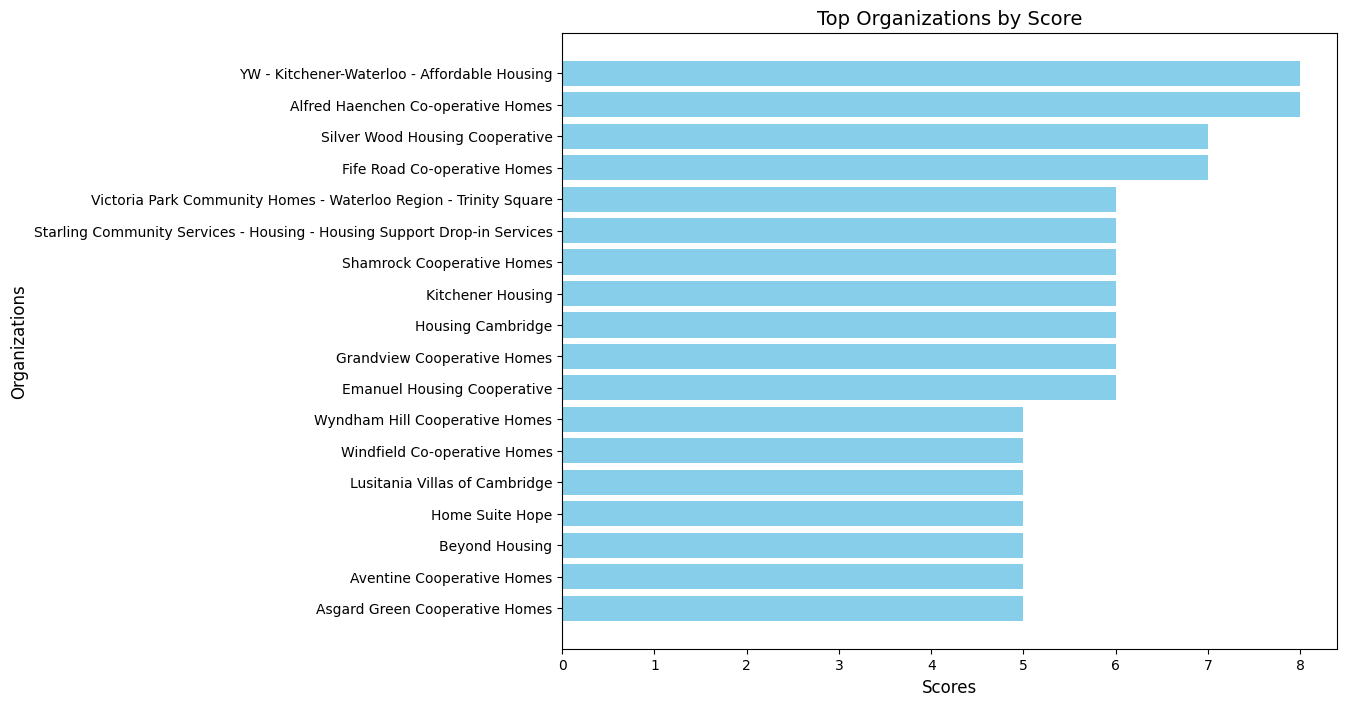

In [ ]:
top_18 = list(highest_first.items())[:18]

org_names = [org for org, score in top_18]
scores = [score for org, score in top_18]

# plot top 18 orgs based on score
plt.figure(figsize=(10, 8))
plt.barh(org_names, scores, color='skyblue')
plt.xlabel('Scores', fontsize=12)
plt.ylabel('Organizations', fontsize=12)
plt.title('Top Organizations by Score', fontsize=14)
plt.gca().invert_yaxis()
plt.show()
